In [23]:
# 필요한 패키지 설치
# ! pip install yellowbrick
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
df = pd.read_csv("../resource/W6/Mall_Customers.csv")

# 데이터 샘플 확인
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


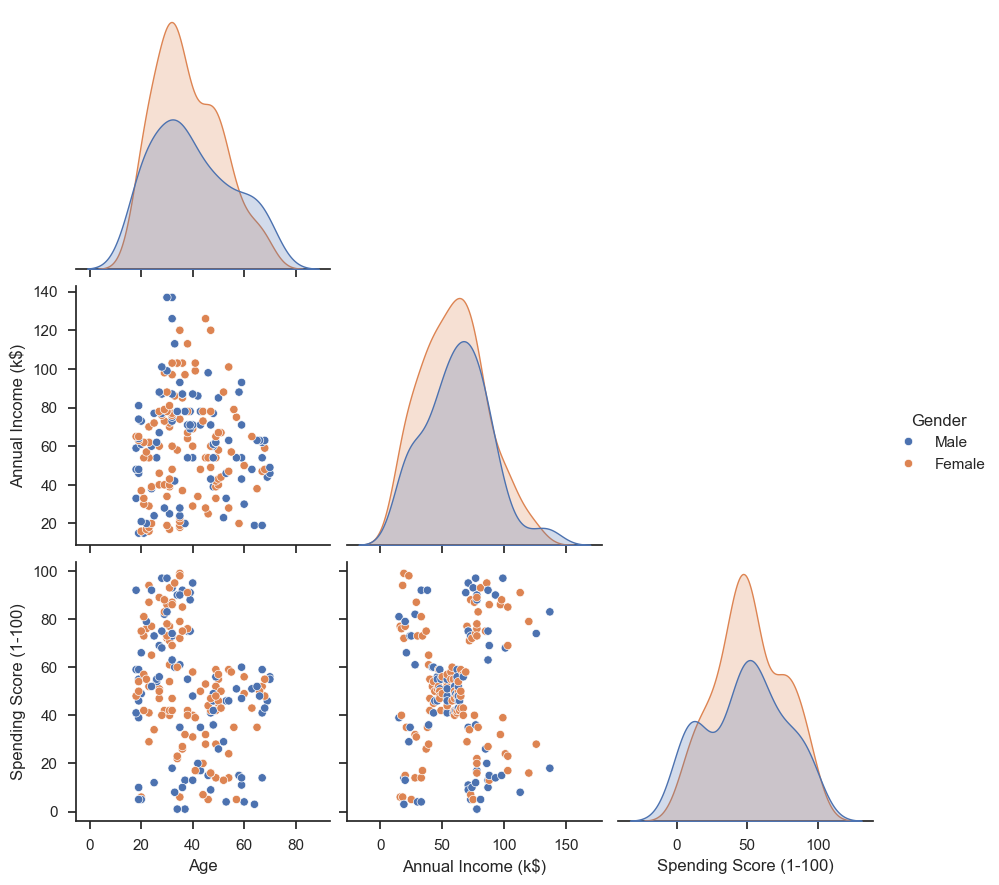

In [25]:
# 산점도 행렬 시각화

# ID 컬럼 제거
df1 = df.drop('CustomerID', axis=1)

sns.set(font_scale=1) 
sns.set_style('ticks') 
sns.pairplot(df1, 
             diag_kind='kde', # 상관계수가 1이면 분포로 표시
             hue = 'Gender',
             corner=True,
             height = 3
            )
# plot_kws={"s": 100}
# plot_kws={"s": 60}

plt.show()

In [26]:
# 데이터 스케일 정규화

# Gender변수 가변수 처리
df2 = pd.get_dummies(df1, columns = ['Gender'],drop_first=True)

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df2)

# 컬럼명 결합
df_minmax = pd.DataFrame(data=df_minmax, columns=df2.columns)

df_minmax.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0


In [27]:
# k-means 클러스터링 모델 생성

kmeans_model_1 = KMeans(
    init="k-means++",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=37
)

kmeans_model_1.fit(df_minmax)

# 최저 SSE 값
print(kmeans_model_1.inertia_)

# 각 군집의 중심점 좌표 확인
print(kmeans_model_1.cluster_centers_)

# 반복 횟수
print(kmeans_model_1.n_iter_)

29.55285761194386
[[1.97115385e-01 3.85245902e-01 7.21173469e-01 1.00000000e+00]
 [3.86504121e-01 3.62704918e-01 5.15579446e-01 4.44089210e-16]
 [6.04567308e-01 3.88661202e-01 2.87840136e-01 1.00000000e+00]]
10


c:\Users\user1\.conda\envs\deep2\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\user1\.conda\envs\deep2\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user1\.conda\envs\deep2\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user1\.conda\envs\deep2\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user1\.conda\envs\deep2\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

<Axes: >

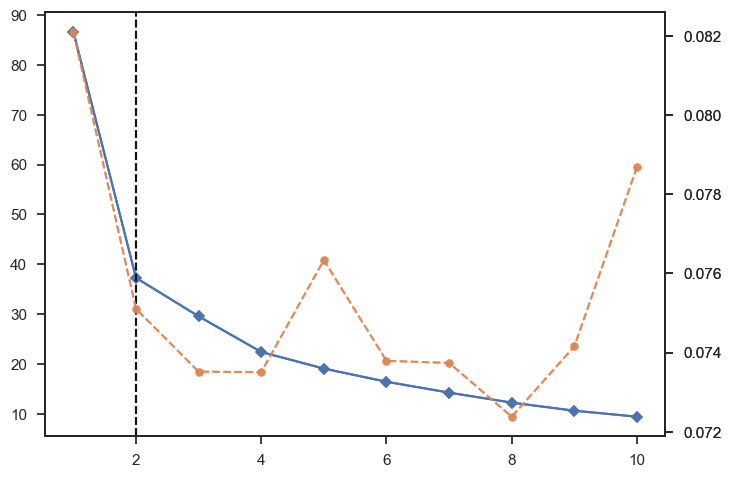

In [28]:
# 엘보우 차트 시각화

Elbow_Chart = KElbowVisualizer(kmeans_model_1, k=(1,11),)
Elbow_Chart.fit(df_minmax)
Elbow_Chart.draw() 

## KElbow 결과에 대한 해석

- k가 2이후 distortion 값의 감소 폭이 확연히 줄어듦 : 꺾이는 지점

=> k = 2 가 가장 적절한 값임

c:\Users\user1\.conda\envs\deep2\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user1\.conda\envs\deep2\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user1\.conda\envs\deep2\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user1\.conda\envs\deep2\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


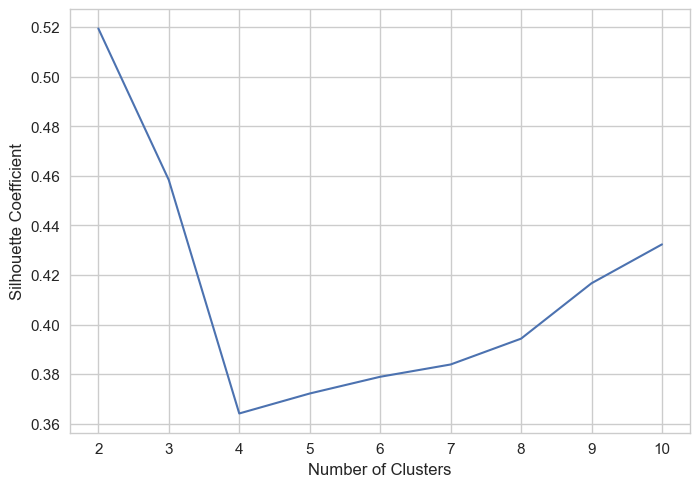

In [29]:
# 실루엣 계수 시각화 1

# k-means 모델 설정
kmeans_model_2 = {
       "init": "k-means++",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 37,
        }

# 각 K의 실루엣 계수 저장
silhouette_coef = []

# 실루엣 계수 그래프 생성
for k in range(2, 11):
    kmeans_silhouette = KMeans(n_clusters=k, **kmeans_model_2)
    kmeans_silhouette.fit(df_minmax)
    score = silhouette_score(df_minmax, kmeans_silhouette.labels_)
    silhouette_coef.append(score)
    
print(plt.style.available)
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot(range(2, 11), silhouette_coef)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

## 실루엣 계수 결과에 대한 판단

- ｋ 값이 ２일때 실루엣 계수 값이 가장 큼

- 실루엣 계수가 클 수록 좋음 （１에 가까울 수록）

=> 따라서 여기서는 ｋ가 ２일때가 가장 잘 나뉘는 군집 수라고 할 수 있음

c:\Users\user1\.conda\envs\deep2\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user1\.conda\envs\deep2\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user1\.conda\envs\deep2\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user1\.conda\envs\deep2\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

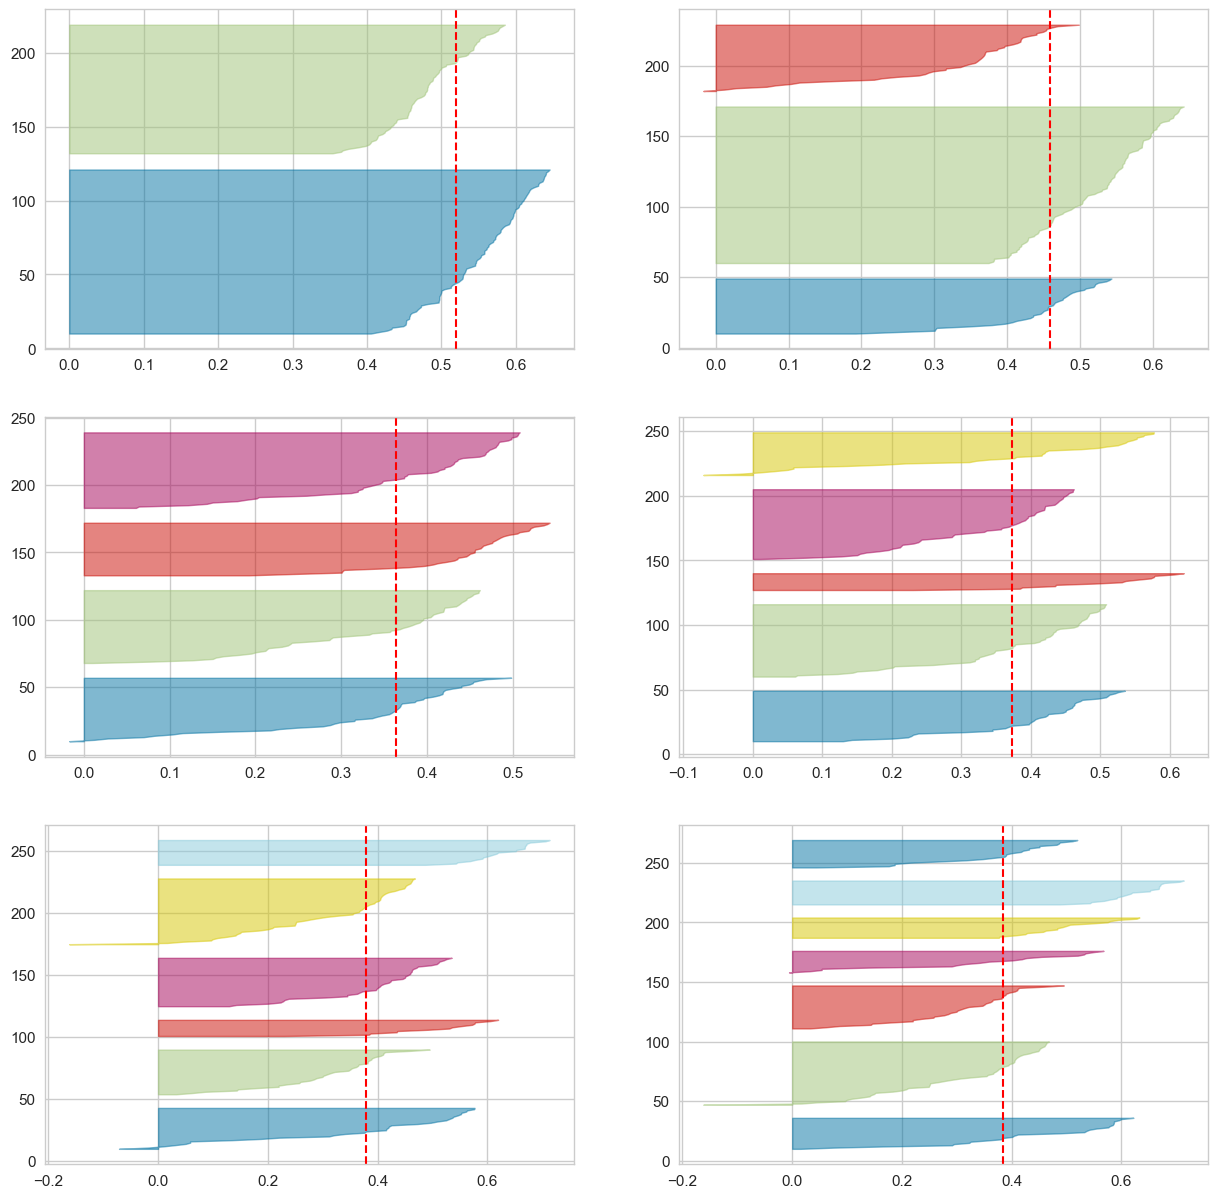

In [30]:
# 실루엣 계수 시각화 2

fig, ax = plt.subplots(3, 2, figsize=(15,15))
for i in [2, 3, 4, 5, 6, 7]:

# k-means 클러스터링 모델 생성
    kmeans_model_3 = KMeans(n_clusters=i, 
                            init="k-means++", 
                            n_init=10, 
                            max_iter=300, 
                            random_state=37)
    q, mod = divmod(i, 2)

# 실루엣 계수 시각화    
    visualizer = SilhouetteVisualizer(kmeans_model_3, 
                                      colors="yellowbrick", 
                                      ax=ax[q-1][mod])
    visualizer.fit(df_minmax)

## Silhouette 계수 결과에 대한 해석

- 막대의 너비: 각 샘플의 실루엣 계수 (클수록 군집에 잘 맞음)

- 빨간 세로 점선: 전체 평균 실루엣 계수

=> 전체 평균 실루엣 계수가 가장 큰 k를 찾아 보면 2가 된다. (0.5 이상이면 매우 좋고 0.25 이상이면 쓸만한 군집)

(각 클러스터의 막대가 넓고 고르게 분포되어 있는지 확인)

(실루엣 너비가 음수로 간 경우: 샘플이 잘못된 군집에 들어갈 가능성 있음)


c:\Users\user1\.conda\envs\deep2\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


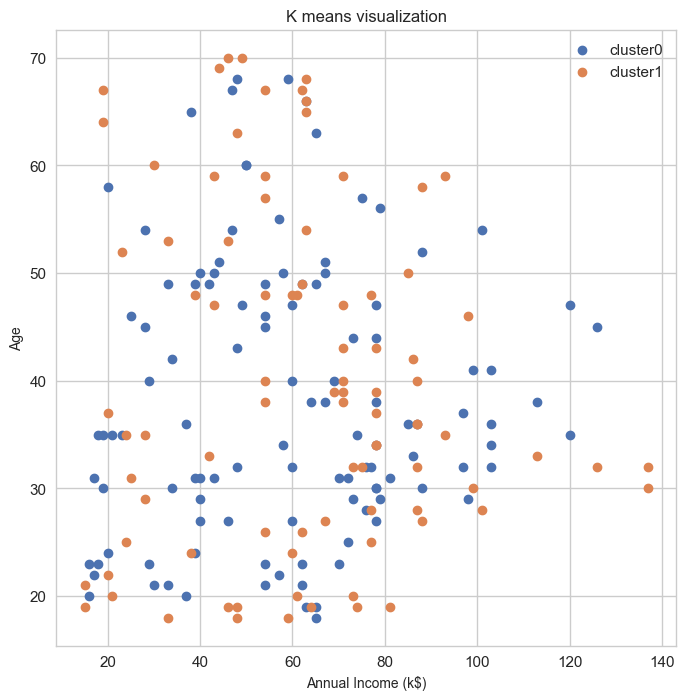

In [31]:
# k-means 클러스터 시각화

# k-means 모델 설정
kmeans_model_4 = KMeans(
    init="k-means++",
    # n_clusters=5,
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=37)

# 군집 번호 결합 
df2['cluster1'] = kmeans_model_4.fit_predict(df_minmax)

# 시각화 설정
plt.figure(figsize = (8, 8))
for i in range(0, df2['cluster1'].max() + 1):
    plt.scatter(df2.loc[df2['cluster1'] == i, 
                        'Annual Income (k$)'], 
                df2.loc[df2['cluster1'] == i, 
                        'Age'], 
                        # 'Spending Score (1-100)'], 
                label = 'cluster'+str(i))

plt.legend()
plt.title('K means visualization', size = 12)
plt.xlabel('Annual Income (k$)', size = 10)
plt.ylabel('Age', size = 10)
# plt.ylabel('Spending Score (1-100)', size = 10)
plt.show()

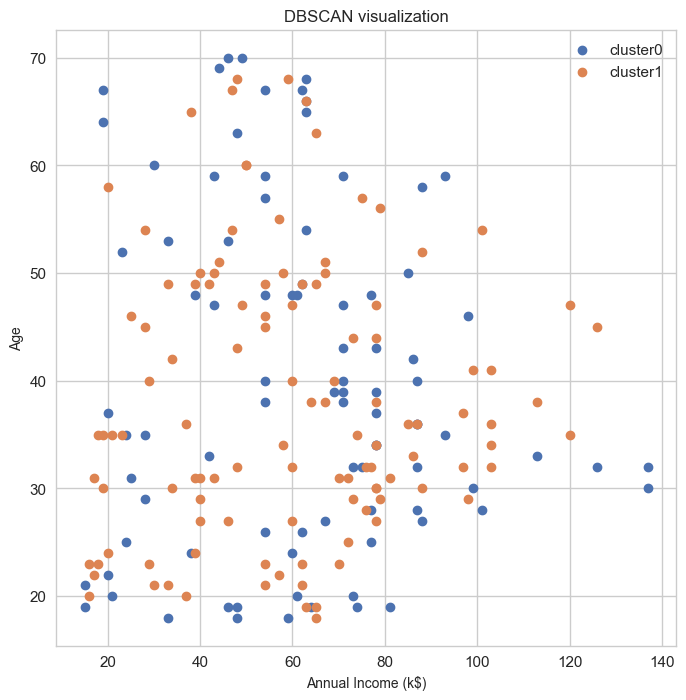

In [32]:
# DBSCAN 모델 생성 및 시각화

# DBSCAN 모델 설정
DBSCAN_model = DBSCAN(eps=0.7, min_samples=5)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
DBSCAN_model.fit(df_minmax)
df2['cluster2'] = DBSCAN_model.fit_predict(df_minmax)

# 시각화 설정
plt.figure(figsize = (8, 8))
for i in range(0, df2['cluster2'].max() + 1):
    plt.scatter(df2.loc[df2['cluster2'] == i, 
                        'Annual Income (k$)'], 
                df2.loc[df2['cluster2'] == i, 
                        'Age'], 
                        # 'Spending Score (1-100)'], 
                    label = 'cluster'+str(i))

plt.legend()
plt.title('DBSCAN visualization', size = 12)
plt.xlabel('Annual Income (k$)', size = 10)
plt.ylabel('Age', size = 10)
# plt.ylabel('Spending Score (1-100)', size = 10)
plt.show()

In [33]:
# k-means 군집 별 특성 확인

df_kmeans = df2.groupby(['cluster1']).agg({'Age':'mean',
                                          'Annual Income (k$)':'mean',
                                          'Spending Score (1-100)':'mean',
                                          'Gender_Male':'mean'
                                          }).reset_index()

df_kmeans['cnt'] = df2.groupby('cluster1')['Age'].count()
df_kmeans.head()

,cluster1,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cnt
0,0,38.098214,59.250000,51.526786,0.0,112
1,1,39.806818,62.227273,48.511364,1.0,88


In [34]:
# DBSCAN 군집 별 특성 확인

df_DBSCAN = df2.groupby(['cluster2']).agg({'Age':'mean',
                                          'Annual Income (k$)':'mean',
                                          'Spending Score (1-100)':'mean',
                                          'Gender_Male':'mean'}).reset_index()

df_DBSCAN['cnt'] = df2.groupby('cluster2')['Age'].count()
df_DBSCAN.head()

,cluster2,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cnt
0,0,39.806818,62.227273,48.511364,1.0,88
1,1,38.098214,59.250000,51.526786,0.0,112
